In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN, GRU
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Flatten, Dense,LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("/content/mushrooms1.csv")
data.head()

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,o,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,o,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,o,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,o,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,o,evanescent,brown,abundant,grasses


In [9]:
print(data.columns)
print(data.shape)
if ~data.isnull().values.any(): print('No missing values')
data.head()

Index(['Class', 'CapShape', 'CapSurface', 'CapColor', 'Bruises', 'Odor',
       'GillAttachment', 'GillSpacing', 'GillSize', 'GillColor', 'StalkShape',
       'StalkRoot', 'StalkSurfaceAboveRing', 'StalkSurfaceBelowRing',
       'StalkColorAboveRing', 'StalkColorBelowRing', 'VeilType', 'VeilColor',
       'RingNumber', 'RingType', 'SporePrintColor', 'Population', 'Habitat'],
      dtype='object')
(8124, 23)
No missing values


,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,o,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,o,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,o,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,o,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,o,evanescent,brown,abundant,grasses


In [10]:
data.dtypes
data.isnull().sum()


Class                    0
CapShape                 0
CapSurface               0
CapColor                 0
Bruises                  0
Odor                     0
GillAttachment           0
GillSpacing              0
GillSize                 0
GillColor                0
StalkShape               0
StalkRoot                0
StalkSurfaceAboveRing    0
StalkSurfaceBelowRing    0
StalkColorAboveRing      0
StalkColorBelowRing      0
VeilType                 0
VeilColor                0
RingNumber               0
RingType                 0
SporePrintColor          0
Population               0
Habitat                  0
dtype: int64

Text(0, 0.5, 'Frequency')

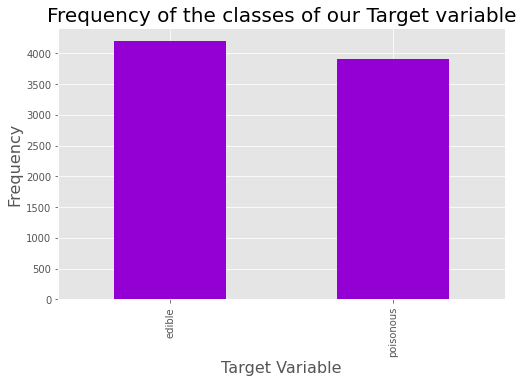

In [11]:
data["VeilType"].value_counts()
data.drop(columns=["VeilType"],inplace=True)
plt.style.use("ggplot")
data["Class"].value_counts().plot(kind="bar",figsize = (8,5), color = "darkviolet")
plt.title("Frequency of the classes of our Target variable", size=20)
plt.xlabel("Target Variable", size = 16)
plt.ylabel("Frequency", size = 16)

In [12]:
X = data.drop(columns=["Class"], axis = 1)
y = data["Class"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)


In [14]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [15]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [16]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [17]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)


Feature 0: 91.374055
Feature 1: 160.963893
Feature 2: 57.431981
Feature 3: 952.386594
Feature 4: 34.961401
Feature 5: 3.135560
Feature 6: 660.370873
Feature 7: 1347.308598
Feature 8: 1099.004673
Feature 9: 25.361532
Feature 10: 921.452657
Feature 11: 77.667201
Feature 12: 36.646386
Feature 13: 355.014479
Feature 14: 341.651666
Feature 15: 4.318830
Feature 16: 21.383513
Feature 17: 1590.284543
Feature 18: 4525.875554
Feature 19: 250.261548
Feature 20: 7.885662


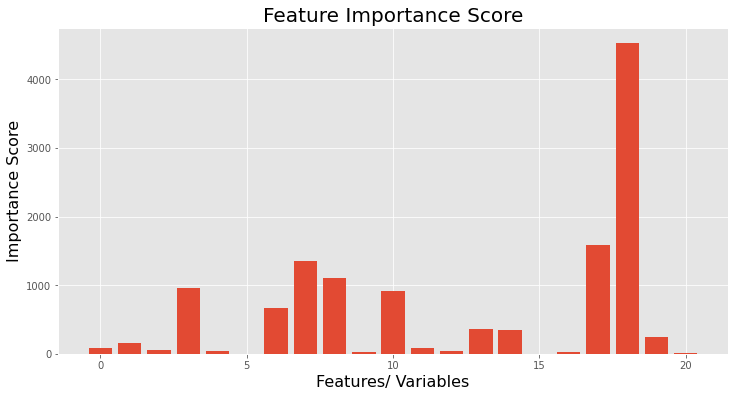

In [18]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize = (12,6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.show()

In [19]:
import numpy as np

In [20]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

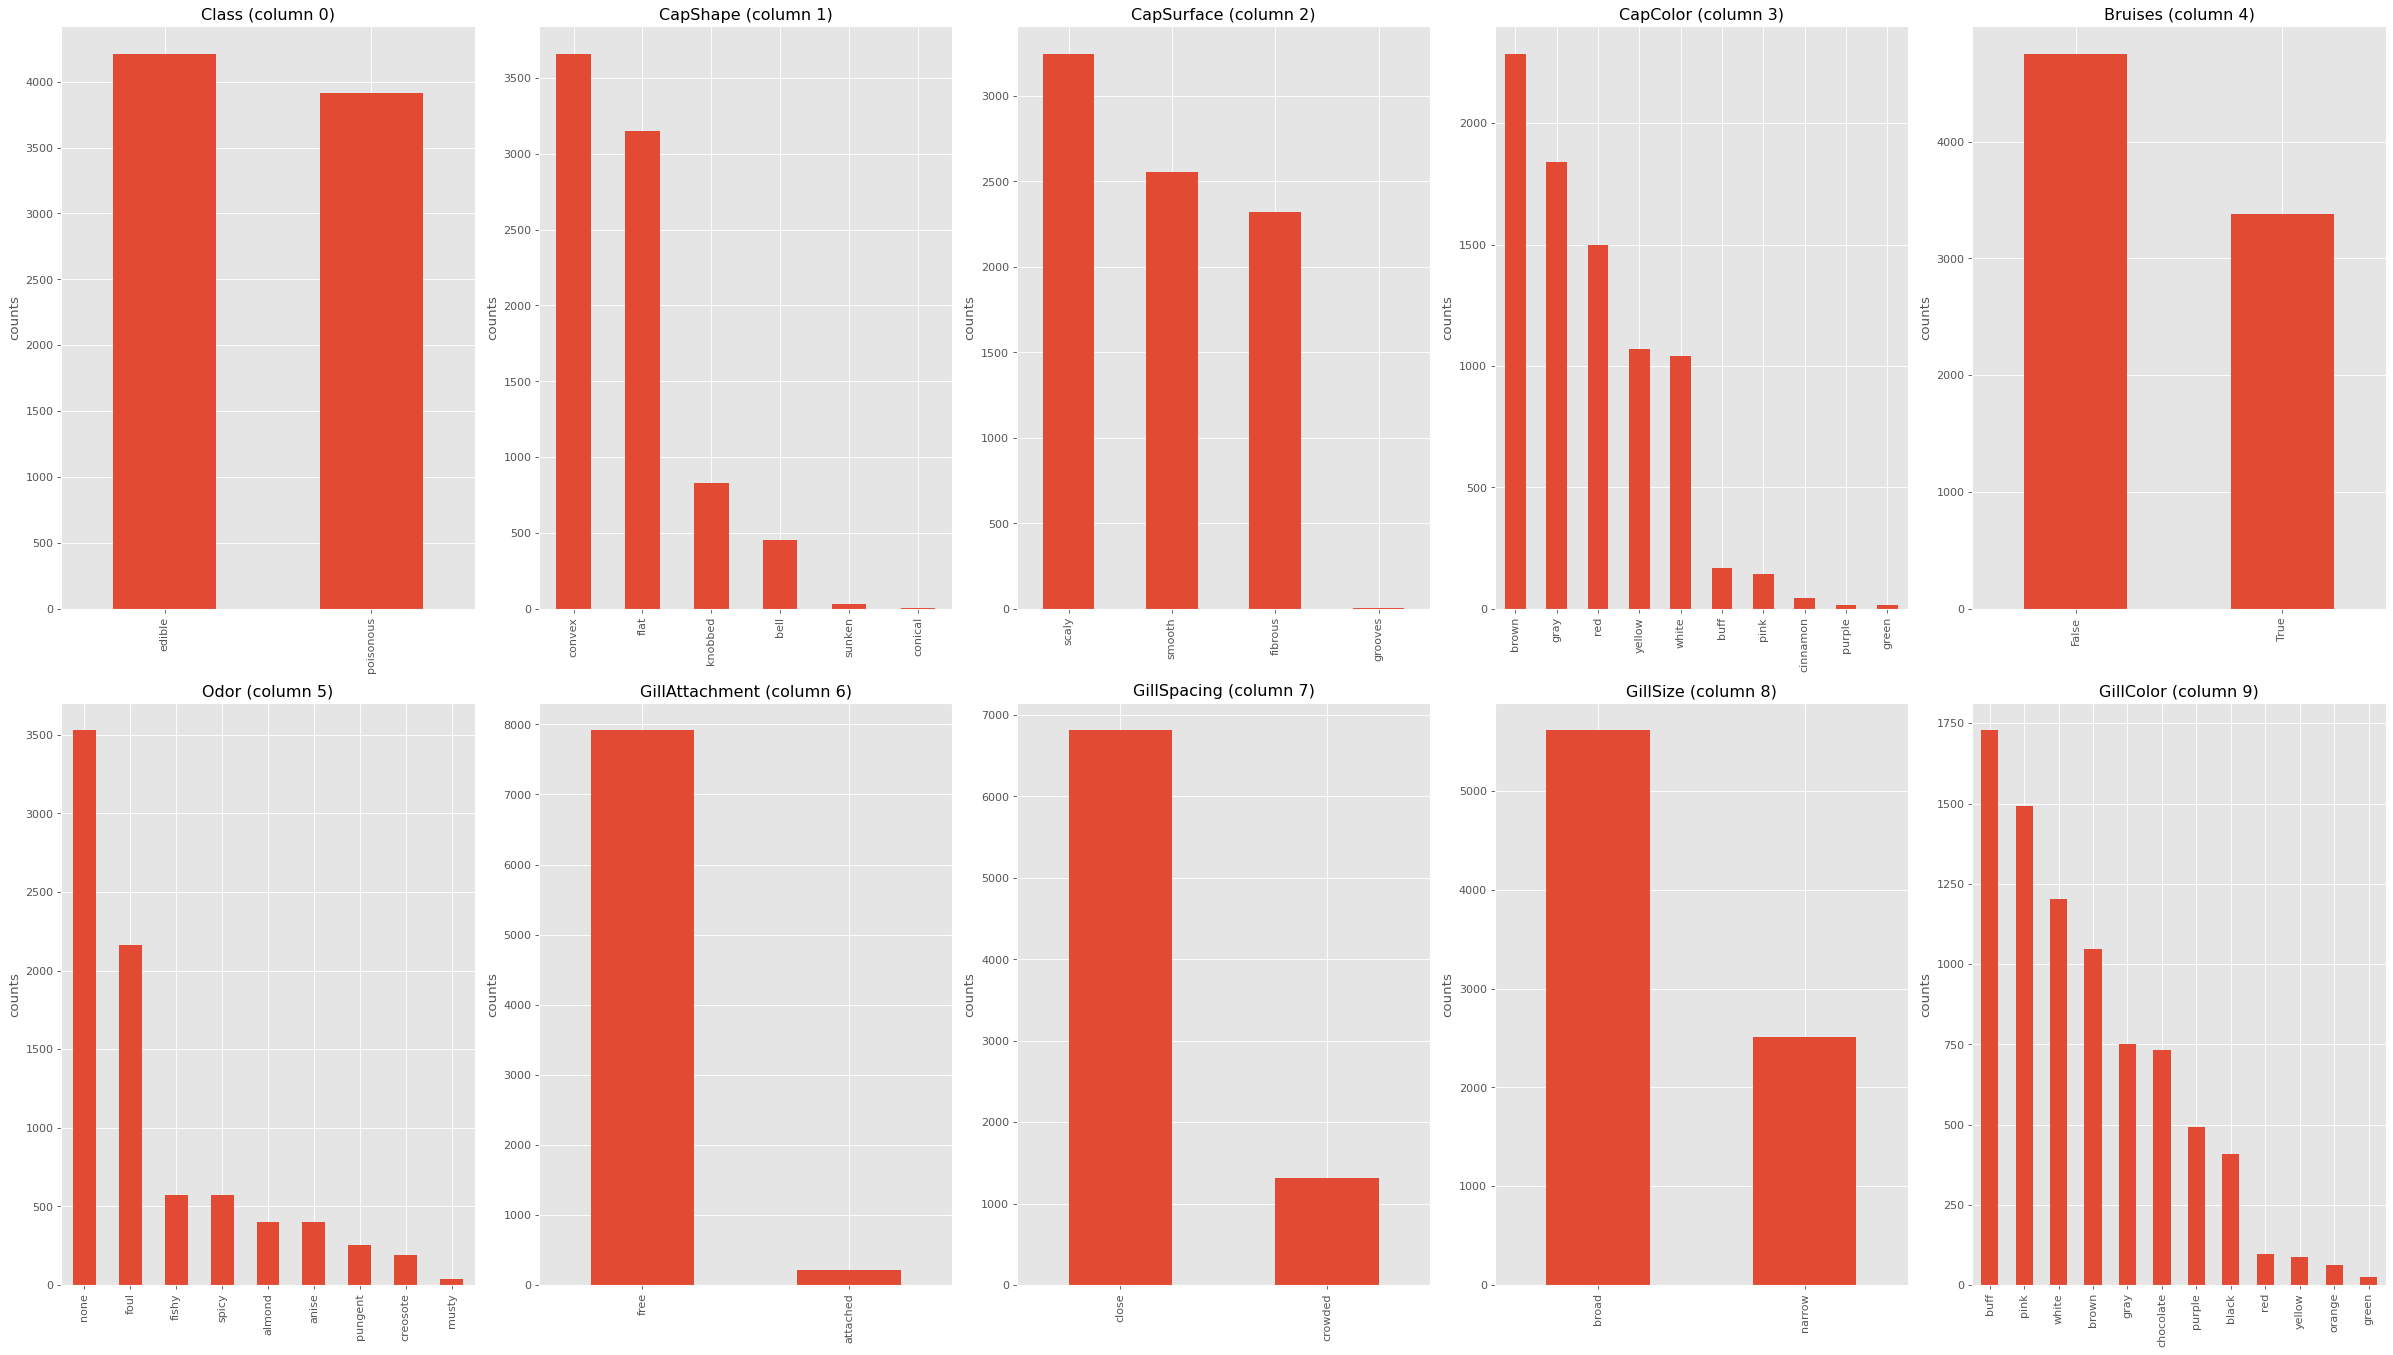

In [21]:
plotPerColumnDistribution(data, 10, 5)


In [22]:
X_train.columns
X_new = X.drop(columns = ["CapSurface", "CapColor", "Odor", "GillAttachment", "StalkShape"
,"StalkColorAboveRing", "StalkColorBelowRing", "VeilColor", "RingNumber"])


In [23]:
X_dummies = pd.get_dummies(X_new, drop_first=True, columns = ["CapShape", "Bruises",
                                                          "GillSpacing", "GillSize", "GillColor",
                                                          "StalkRoot", "StalkSurfaceAboveRing",
                                                          "StalkSurfaceBelowRing", "RingType",
                                                          "SporePrintColor", "Population", "Habitat"])

In [24]:
label = LabelEncoder()
data["class_2"]=label.fit_transform(data["Class"])
y_encoded = data["class_2"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_dummies, y_encoded, test_size = 0.2, random_state = 0, stratify = y_encoded)
X_train_2.shape

(6499, 52)

In [25]:
X_train_2=np.array(X_train_2)
print(X_train_2)

[[0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 1 0 ... 0 0 1]]


In [26]:
X_train_2.shape, y_train_2.shape

((6499, 52), (6499,))

In [27]:
X_test_2=np.array(X_test_2)
print(X_test_2)

[[0 1 0 ... 0 1 0]
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [28]:
X_train_2 = X_train_2[...,None]
X_train_2.shape


(6499, 52, 1)

In [29]:
 X_train_2 = X_train_2.astype('float')


In [30]:
X_test_2.shape

(1625, 52)

In [39]:
filters = 250
kernel_size = 3
model = Sequential()
model.add(layers.Conv1D(filters,
                            kernel_size,
                            padding='valid',
                            activation='relu',
                            strides=1))
model.add(layers.MaxPooling1D())
model.add(SimpleRNN(units=512, return_sequences=True, activation='relu', input_shape=(X_train_2.shape[1], 1)))
model.add(Dense(units=1))





In [40]:
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['accuracy'])


In [41]:
history=model.fit(X_train_2, y_train_2,
          epochs=3,
          validation_data=(X_test_2, y_test_2),
          batch_size=100, 
          verbose=1)

Epoch 1/3
65/65 [==============================] - 3s 35ms/step - loss: 0.2488 - accuracy: 0.5833 - val_loss: 0.2209 - val_accuracy: 0.6541
Epoch 2/3
65/65 [==============================] - 3s 49ms/step - loss: 0.1522 - accuracy: 0.7986 - val_loss: 0.0826 - val_accuracy: 0.8989
Epoch 3/3
65/65 [==============================] - 2s 30ms/step - loss: 0.0629 - accuracy: 0.9195 - val_loss: 0.0513 - val_accuracy: 0.9329


In [42]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.figure(figsize = (12,6))
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.figure(figsize = (12,6))
  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()
  

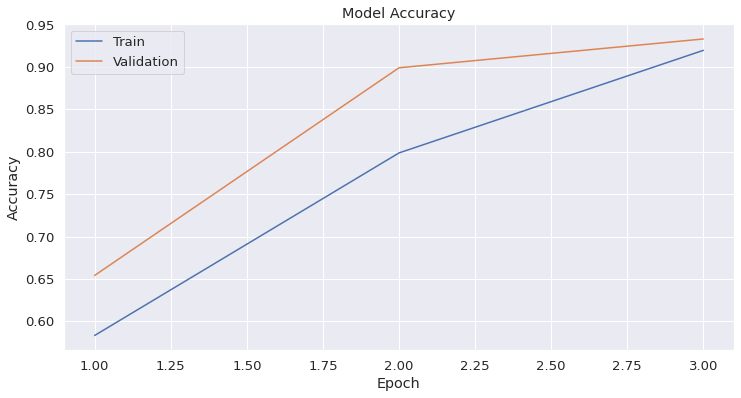

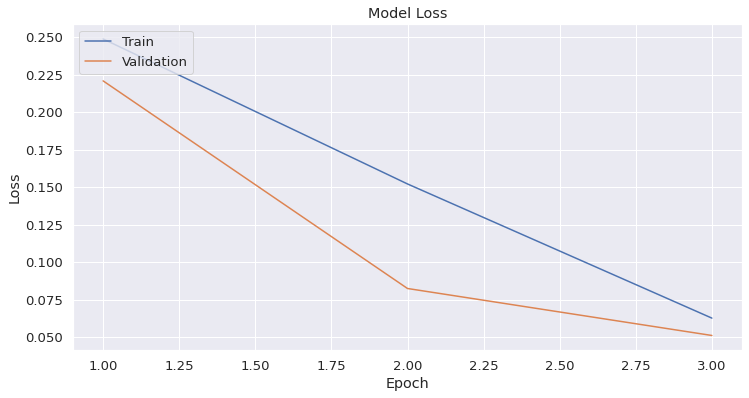

In [43]:
plotLearningCurve(history,3)


In [44]:
y_pred = np.argmax(model.predict(X_test_2),axis=1)


51/51 [==============================] - 0s 5ms/step


In [45]:
cm=confusion_matrix(y_test_2, y_pred)
cm

array([[495, 269,  57,   5,   0,   0,  10,   1,   0,   0,   0,   5,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   6,   2,   0,  85,  68,   0,   6,   3,   2,  17,  80,  86,
         99,  18,  11,  29,  13,  27,  71,  50, 109],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 

Text(0.5, 1.0, 'Confusion Matrix Plotting')

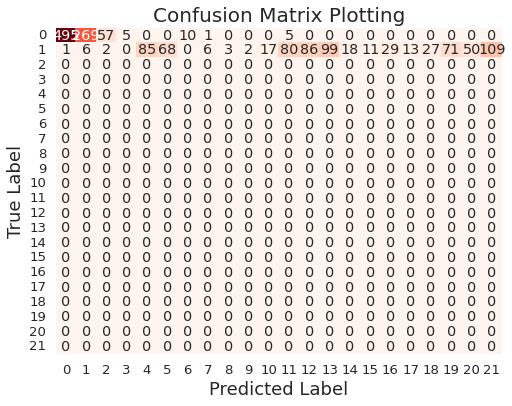

In [46]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("Predicted Label", size = 18)
plt.ylabel("True Label", size = 18)
plt.title("Confusion Matrix Plotting", size = 20)